<a href="https://colab.research.google.com/github/Tharun173/CSE22173-ML-LAB/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('/content/Lab Session Data(Purchase data).csv')

# Display the columns before removal
print("Columns before removal:", data.columns)

# Drop the 'Customer' column and the unnamed columns that contain no data
data.drop(columns=['Customer', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
                   'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                   'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], inplace=True)

# Fill missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify the columns after processing
print("Columns after processing:", data_imputed.columns)

# Splitting the data into features and target variable
X = data_imputed.drop(columns=['Payment (Rs)'])  # Replace with the correct target column name
y = data_imputed['Payment (Rs)']  # Replace with the correct target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Classification Report
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)

# Print results
print("Training Confusion Matrix:\n", conf_matrix_train)
print("Test Confusion Matrix:\n", conf_matrix_test)
print("Training Classification Report:\n", class_report_train)
print("Test Classification Report:\n", class_report_test)




Columns before removal: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk'],
      dtype='object')
Columns after processing: Index(['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)',
       'Candy', 'Mango', 'Milk'],
      dtype='object')
Training Confusion Matrix:
 [[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]]
Test Confusion Matrix:
 [[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]
Training Classification Report:
               precision    recall  f1-score   support

       110.0       1.00      1.00      1.00         1
       198.0       0.50      1.00      0.67         1
       271.0      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

IT IS REGULAR Fit

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Lab Session Data(Purchase data).csv')

# Drop unnecessary columns
data.drop(columns=['Customer', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
                   'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                   'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], inplace=True)

# Splitting the data into features and target variable
X = data.drop(columns=['Payment (Rs)'])  # Replace with the correct target column name
Y = data['Payment (Rs)']  # Replace with the correct target column name

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply imputation to handle any remaining NaNs in both training and testing sets
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training set
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify there are no NaNs in the data
print("Are there any NaNs in X_train?", X_train.isnull().any().any())
print("Are there any NaNs in X_test?", X_test.isnull().any().any())

# Train a kNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, Y_train)

# Predictions
Y_pred = knn_reg.predict(X_test)

# MSE
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE: {mse}')

# RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# MAPE
mape = mean_absolute_percentage_error(Y_test, Y_pred) * 100
print(f'MAPE: {mape}%')

# R-squared
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')


Are there any NaNs in X_train? False
Are there any NaNs in X_test? False
MSE: 3346.1111111111118
RMSE: 57.8455798753121
MAPE: 32.128890384697115%
R-squared: 0.14265786027444038


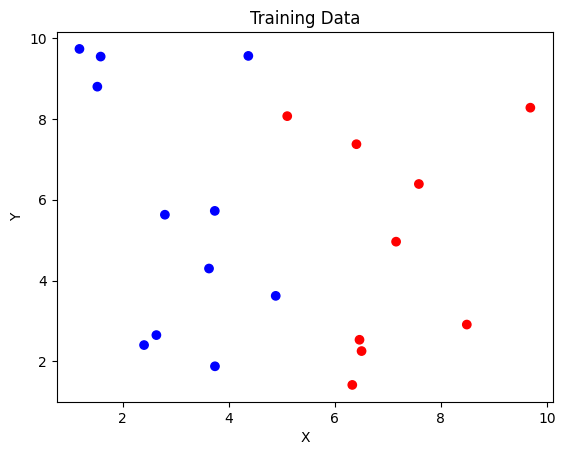

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random points between 1 and 10
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))

# Assign classes based on some condition
y_train = np.array([0 if x[0] < 5 else 1 for x in X_train])

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.show()


In [20]:
# Generate test set with values of X & Y between 0 and 10
X_test = np.array([[x, y] for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])

# Predict using the trained kNN model
y_pred = knn.predict(X_test)

# Scatter plot of test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification (k=3)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 6 features as input.

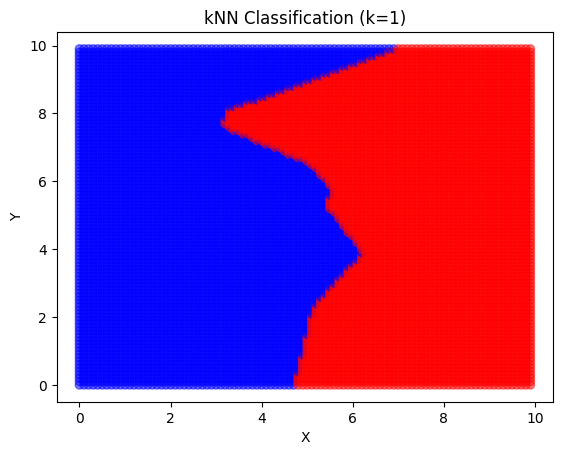

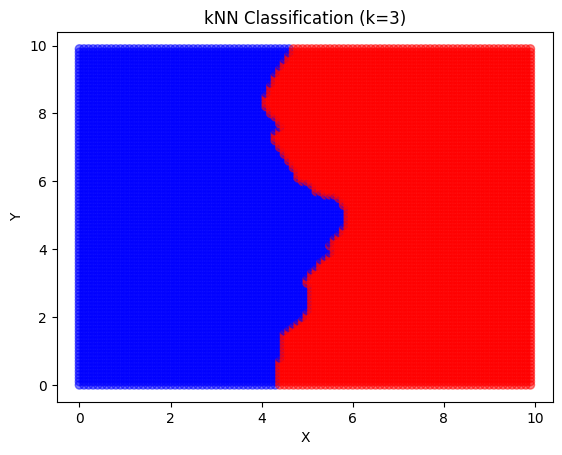

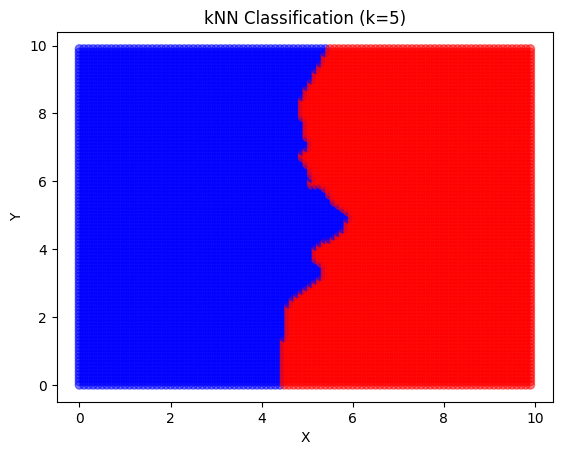

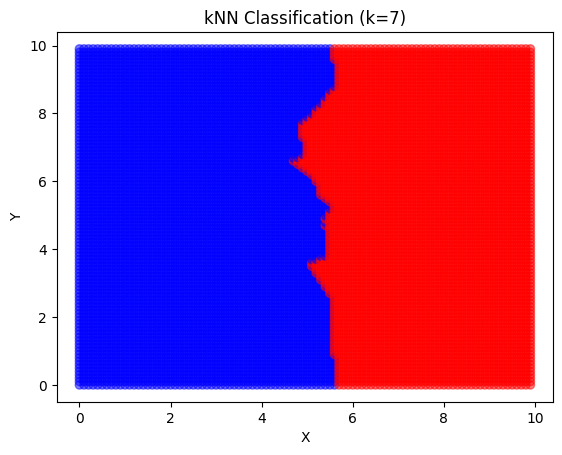

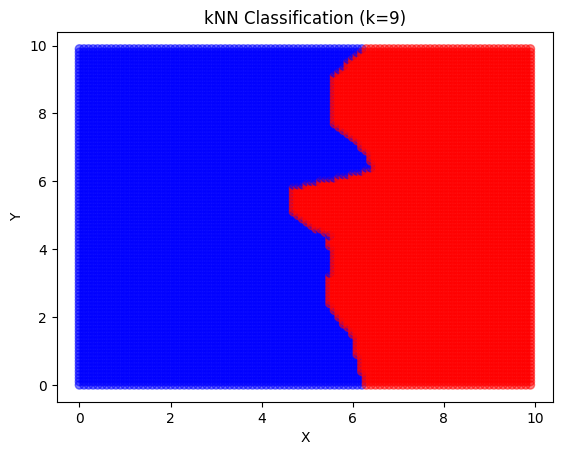

In [21]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Scatter plot of test data for each k
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classification (k={k})')
    plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 21)}

# Apply GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameter
print("Best k:", grid_search.best_params_)


Best k: {'n_neighbors': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, retu